In [2]:
#Import All the nessasary Libraries 
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data    

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Preprocessing Data: Let's One hot encode our dataframe to get rid of the non integer type data
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
#Create x and y values
X = data_one_hot.drop("charges",axis=1) 
y = data_one_hot["charges"]

In [5]:
#view X
X.head() 

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
#View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
#Create Training and Testing sets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Model 1**

In [24]:
#Create a neural network 
tf.random.set_seed(42)
#create the model
model = tf.keras.Sequential(name="InsuranceModel")
model.add(tf.keras.layers.Dense(11))
model.add(tf.keras.layers.Dense(1))
#Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer= tf.keras.optimizers.SGD() , metrics = ["mae"])
#Fit the model
history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 533us/step - loss: 8642.9043 - mae: 8642.9043
Epoch 2/100
34/34 [==============================] - 0s 635us/step - loss: 7867.2671 - mae: 7867.2671
Epoch 3/100
34/34 [==============================] - 0s 634us/step - loss: 7593.1357 - mae: 7593.1357
Epoch 4/100
34/34 [==============================] - 0s 695us/step - loss: 7578.6602 - mae: 7578.6602
Epoch 5/100
34/34 [==============================] - 0s 725us/step - loss: 7628.3853 - mae: 7628.3853
Epoch 6/100
34/34 [==============================] - 0s 635us/step - loss: 7653.3208 - mae: 7653.3208
Epoch 7/100
34/34 [==============================] - 0s 604us/step - loss: 7569.1045 - mae: 7569.1045
Epoch 8/100
34/34 [==============================] - 0s 604us/step - loss: 7761.1704 - mae: 7761.1704
Epoch 9/100
34/34 [==============================] - 0s 755us/step - loss: 7527.0537 - mae: 7527.0537
Epoch 10/100
34/34 [==============================] - 0s 635us/step - loss: 7736.1

In [25]:
#Check result of our model on testing data
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 623us/step - loss: 6899.5874 - mae: 6899.5874


[6899.58740234375, 6899.58740234375]

Text(0, 0.5, 'loss')

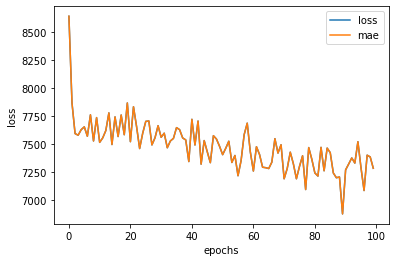

In [27]:
#Plot History also known as loss curve or training curve 
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

Now Initial model is built.Now Let's improve our model. We can do the following for the same 
1. Add extra Hidden Layers
2. Change the Optimizers 
3. Increase the number of epochs 

**Model 2**

In [26]:
#Add extra Layers
#Note: Adding extra layer did not work initially as model became too complex and resulted in mae = nan
#Change the Optimizer.
#Note: after changing the optimizer Adding extra layer worked
#set random seed
tf.random.set_seed(42)
#create our model 
model_2 = tf.keras.Sequential(name="InsuranceModel2")
model_2.add(tf.keras.layers.Dense(100))       #Here Our model becomes too complex as the resulting mae is nan when used SGD optimizer 
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))

#compile our model
model_2.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(),metrics = ["mae"])
#fit the model
history_2 = model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 605us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 786us/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 635us/step - loss: 12749.5410 - mae: 12749.5410
Epoch 4/100
34/34 [==============================] - 0s 665us/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 756us/step - loss: 10905.8164 - mae: 10905.8164
Epoch 6/100
34/34 [==============================] - 0s 665us/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/100
34/34 [==============================] - 0s 635us/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 725us/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 665us/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 665us/step - lo

In [14]:
model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 818us/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

Text(0, 0.5, 'loss')

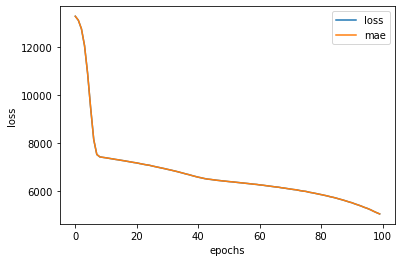

In [28]:
#Plot History also known as loss curve or training curve 
pd.DataFrame(history_2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

**Model 3**

In [21]:
#set ramdom seed
tf.random.set_seed(42)
#create a model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))
#Compile the model
model_3.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.Adam() , metrics = ["mae"])
#Fit the model 
history_3 = model_3.fit(X_train,y_train,epochs=250)

Epoch 1/250
34/34 [==============================] - 0s 611us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/250
34/34 [==============================] - 0s 695us/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/250
34/34 [==============================] - 0s 756us/step - loss: 12749.5410 - mae: 12749.5410
Epoch 4/250
34/34 [==============================] - 0s 631us/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/250
34/34 [==============================] - 0s 606us/step - loss: 10905.8164 - mae: 10905.8164
Epoch 6/250
34/34 [==============================] - 0s 614us/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/250
34/34 [==============================] - 0s 642us/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/250
34/34 [==============================] - 0s 622us/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/250
34/34 [==============================] - 0s 616us/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/250
34/34 [==============================] - 0s 612us/step - lo

In [22]:
model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 748us/step - loss: 3349.7598 - mae: 3349.7598


[3349.759765625, 3349.759765625]

Text(0, 0.5, 'loss')

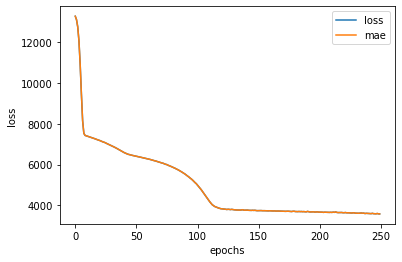

In [23]:
#Plot History also known as loss curve or training curve 
pd.DataFrame(history_3.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

Now we perform Feature Scaling i.e Normalization and OneHotEncoding

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder 
from sklearn.model_selection import train_test_split

#Create a column Transformer 
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), #turn all values between 0-1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#Create X and Y values again
X = data.drop("charges",axis=1)
y = data["charges"]

#Build our train and test set 
X_train, X_test , y_train  ,y_test  = train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the column transformer to our training data 
ct.fit(X_train)

# #Transform training and testying data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train) 
X_test_normal = ct.transform(X_test)

Now Build the model on above normalized data 